In [5]:
import numpy as np
import pandas as pd
import nltk
import string
import re

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

In [7]:
import warnings
warnings.simplefilter(action='ignore')

In [8]:
df= pd.read_csv('train.csv')
df_train = pd.read_csv('train.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [19]:
df= pd.read_csv('test_with_no_labels.csv')
df_test = pd.read_csv('test_with_no_labels.csv')
df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [20]:
# number of values per sentiments
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [21]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<AxesSubplot:ylabel='sentiment'>

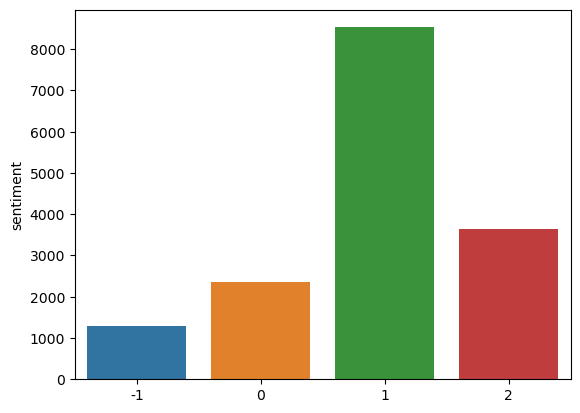

In [22]:
plot = df_train[ 'sentiment'].value_counts()
sns.barplot(plot.index,plot)
#class Description
#2 News: the tweet links to factual news about climate change
#1 Pro: the tweet supports the belief of man-made climate change
#0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
#-1 Anti: the tweet does not believe in man-made climate change Variable definitions

# we can see from the plot that a lot of people are of sentiment 1 and the least are of sentiment -1 which indicates anti

In [10]:
import re

def clean_text(text):
    text = re.sub('[\d-]', '', text) #remove any numbers and substitute with "" empty space
    text = re.sub(r'RT', '', text) #remove the retweets and substitute with ""empty space
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'http', text) #remove the url and replace with http
    return text

In [11]:
df['message'] = df['message'].apply(clean_text)

In [12]:
import nltk
tokenizer = nltk.RegexpTokenizer(r"\w+")#returned words and remove any punctuations
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [13]:
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lower_cased_tokens = [t.lower() for t in tokens]#convert  into lower cases
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lower_cased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]#remove stopwords
    
    return useful_tokens

In [14]:
message_to_token_list(df['message'][2])

['scary',
 'unimpeachable',
 'evidence',
 'climate',
 'change',
 'already',
 'http',
 'itstimetochange',
 'climatechange',
 'zeroco_']

In [15]:
df['message'] = df['message'].apply(message_to_token_list)
df['message']= df['message'].apply(lambda x: " ".join(x))


df.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,karoli morgfair osborneink dailykos putin got ...,476263
4,fakewillmoore female orgasm cause global warmi...,872928


In [16]:
df_test['message'] = df_test['message'].apply(clean_text)
df_test['message'] = df_test['message'].apply(message_to_token_list)
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_data(train, test):
    vectorizer = TfidfVectorizer()
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data, vectorizer

In [18]:
train_data, test_data, vectorizer = vectorize_data(df['message'], df_test['message'])
feature_names = vectorizer.get_feature_names_out()
for name in feature_names:
    print(name)

___
____
__joshbailey
_ajaymurthy
_alexduffus
_alexhirsch
_america
_anunnery
_carloshoy
_cjwade
_com
_courtneigh_
_dbz
_eleanorwebster
_gabibea
_grendan
_iamlynn_
_iamroyal
_imjonah
_incech
_iwakeli_i
_jessssicalaura
_joshuaaaaa_
_k_n_z_
_lsm
_mackenziemaee
_makada_
_marisamanchac
_mercurialgirl
_milanko
_mistiu
_nnocci
_probablysarah_
_richardblack
_shirleyst
_spectrumfm_
_thekingleo_
_wintergirl
a_clizarazo
a_helena
aaaaaaaaa
aan
aap
aardig
aarey
aarkunine
aarmd
aarnwlsn
aaronbastani
aaroncarter
aatishb
ab
aba
ababa
abandon
abandoned
abandoning
abated
abbakkahypatia
abbiehennig
abbott
abbottã
abbymartin
abbymccartin
abbysmithdc
abc
abccompass
abcforkids
abcnews
abcpolitics
abdic
abdulghani
abedelrey
aberevere
abide
ability
able
ableg
abninfvet
abnormal
abo
abolished
abolishes
abortion
abortionfunds
aboã
abpoli
abraham
abridgwater
abroad
abrupt
abruptly
abscbn
abscbnnews
absence
absent
absltly_haram
absolute
absolutely
absoluã
absorb
abstract
absurd
absurdistwords
abt
abundanceinv
abu

In [19]:
# Splitting out the X variable from the target
y = df_train['sentiment']
x= df_train['message']

In [20]:
# Turning text into something the model can read
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,2), min_df =2, stop_words ="english")
x_vectorized = vectorizer.fit_transform(x)

In [21]:
#Spliting the training data into a tarining and validation set
x_train, x_val, y_train, y_val = train_test_split(x_vectorized, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [22]:
print("Shape of train_data:", train_data.shape) 
print("Shape of y:", y.shape)

Shape of train_data: (10546, 16937)
Shape of y: (15819,)


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
 
# Splitting your data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_vectorized, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)  

In [24]:
 # Initialize a Logistic Regression model
logistic_regression_model = LogisticRegression() 

In [25]:
# Train the model on the training data 
logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

In [26]:
 # Make predictions on the validation data 
y_pred = logistic_regression_model.predict(x_val) 

In [27]:
# Evaluate the model using classification report 
print(classification_report(y_val, y_pred, target_names=['-1: Anti', '0: Neutral', '1: Pro', '2: News']))

              precision    recall  f1-score   support

    -1: Anti       0.85      0.26      0.40       389
  0: Neutral       0.71      0.31      0.43       706
      1: Pro       0.71      0.93      0.80      2559
     2: News       0.79      0.70      0.74      1092

    accuracy                           0.73      4746
   macro avg       0.76      0.55      0.59      4746
weighted avg       0.74      0.73      0.70      4746



In [28]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
# Load the test data from the 'test.csv' file 
test_df = pd.read_csv('test_with_no_labels.csv') 


In [29]:
# Vectorize the test data using the same vectorizer used for training 
x_test_vectorized = vectorizer.transform(test_df['message']) 


In [30]:
# Use your trained logistic regression model to predict sentiments for the vectorized test data
y_test_pred = logistic_regression_model.predict(x_test_vectorized) 


In [31]:
# Create a DataFrame to store the results 
results_df = pd.DataFrame({'tweetid': test_df['tweetid'], 'sentiment': y_test_pred}) 
# Save the results to a CSV file 
results_df.to_csv('test_results.csv', index=False)

In [32]:
y_test_pred.shape

(10546,)

In [33]:
df.head

<bound method NDFrame.head of                                                  message  tweetid
0      europe looking china make sure alone fighting ...   169760
1      combine polling staffer climate change woman r...    35326
2      scary unimpeachable evidence climate change al...   224985
3      karoli morgfair osborneink dailykos putin got ...   476263
4      fakewillmoore female orgasm cause global warmi...   872928
...                                                  ...      ...
10541  brittanybohrer brb writing poem climate change...   895714
10542  year climate change came home hottest year rec...   875167
10543  loop_vanuatu pacific country positive fiji lea...    78329
10544  xanria_ hot must cause global warming aldublab...   867455
10545  chloebalaoing climate change global issue gett...   470892

[10546 rows x 2 columns]>